1) Load a dataset using Pandas and perform data cleaning operations such as removing null values, removing duplicates,number format etc.

In [168]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
#pip install openpyxl

In [170]:
df = pd.read_excel("dataset.xlsx")
df.head(5)

,Segment,Category,Sub-Category,City,Order Date,Postal Code,Region,Ship Status,State,Profit,Quantity,Sales
0,Home Office,Office Furniture,Storage Cabinets,Holyoke,2019-07-06,1040.0,Eastern,Early Delivery,Massachusetts,36,3,262
1,Corporate,Office Supplies,Folders,Leominster,2019-11-26,1453.0,Eastern,Early Delivery,Massachusetts,17,5,732
2,Corporate,Office Supplies,Folders,Leominster,2019-11-26,1453.0,Eastern,Early Delivery,Massachusetts,12,5,15
3,Consumer,Office Supplies,Label Maker Tape,Leominster,2019-02-25,1453.0,Eastern,Early Delivery,Massachusetts,3,6,958
4,Consumer,Office Supplies,Printing Paper,Leominster,2019-02-25,1453.0,Eastern,Early Delivery,Massachusetts,55,3,22


In [171]:
df.rename(columns={'Order Date': 'Order_Date', 'Postal Code': 'Postal_Code', 'Ship Status': 'Ship_Status',
                  'Sub-Category': 'Sub_Category'}, inplace=True)

In [172]:
df.columns

Index(['Segment', 'Category', 'Sub_Category', 'City', 'Order_Date',
       'Postal_Code', 'Region', 'Ship_Status', 'State', 'Profit', 'Quantity',
       'Sales'],
      dtype='object')

In [173]:
df.describe()

,Postal_Code,Profit,Quantity,Sales
count,9983.000000,9994.000000,9994.000000,9994.000000
mean,55245.233297,28.651891,3.789574,229.873324
std,32038.715955,234.255712,2.225110,623.248946
min,1040.000000,-6600.000000,1.000000,0.000000
25%,23223.000000,2.000000,2.000000,17.000000
50%,57103.000000,9.000000,3.000000,54.500000
75%,90008.000000,29.000000,5.000000,210.000000
max,99301.000000,8400.000000,14.000000,22638.000000


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Segment       9994 non-null   object        
 1   Category      9994 non-null   object        
 2   Sub_Category  9994 non-null   object        
 3   City          9994 non-null   object        
 4   Order_Date    9994 non-null   datetime64[ns]
 5   Postal_Code   9983 non-null   float64       
 6   Region        9994 non-null   object        
 7   Ship_Status   9994 non-null   object        
 8   State         9994 non-null   object        
 9   Profit        9994 non-null   int64         
 10  Quantity      9994 non-null   int64         
 11  Sales         9994 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 937.1+ KB


In [175]:
np.shape(df)

(9994, 12)

2) Use Pandas to calculate summary statistics for a dataset, such as mean, median, and standard deviation.

In [176]:
df.Quantity.mean()

3.789573744246548

In [177]:
df.Profit.median()

9.0

In [178]:
df.Sales.std()

623.2489456361585

3) Create a scatter plot using Matplotlib to visualize the relationship between two variables in a dataset.

Text(0.5, 1.0, 'Profit per Region')

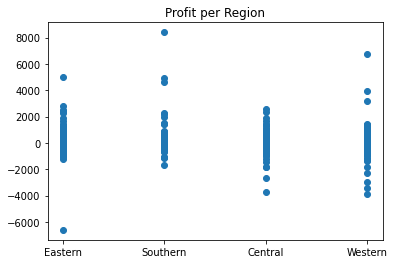

In [179]:
plt.scatter(df.Region, df.Profit)
plt.title("Profit per Region")

4) Use Pandas to group the data by a categorical variable and calculate summary statistics for each group.

In [180]:
subcategory = df.groupby('Sub_Category')['Sub_Category'].count()
subcategory.sort_values(ascending=False)

Sub_Category
Folders                  1523
Printing Paper           1370
Corner Desks              957
Phone and Fax             889
Storage and Archive       846
Artwork and Statues       796
Cables and Connectors     775
Computer Chairs           617
Envelopes                 471
Kitchen Appliances        466
Label Maker Tape          364
Standard Desks            319
Storage Cabinets          228
Stationary Supplies       190
Printers                  183
Name: Sub_Category, dtype: int64

5) Create a line chart using Matplotlib to visualize the trend of a variable over time.

In [181]:
sorted_df = df.sort_values(by=['Order_Date'])

Text(0, 0.5, 'Sales')

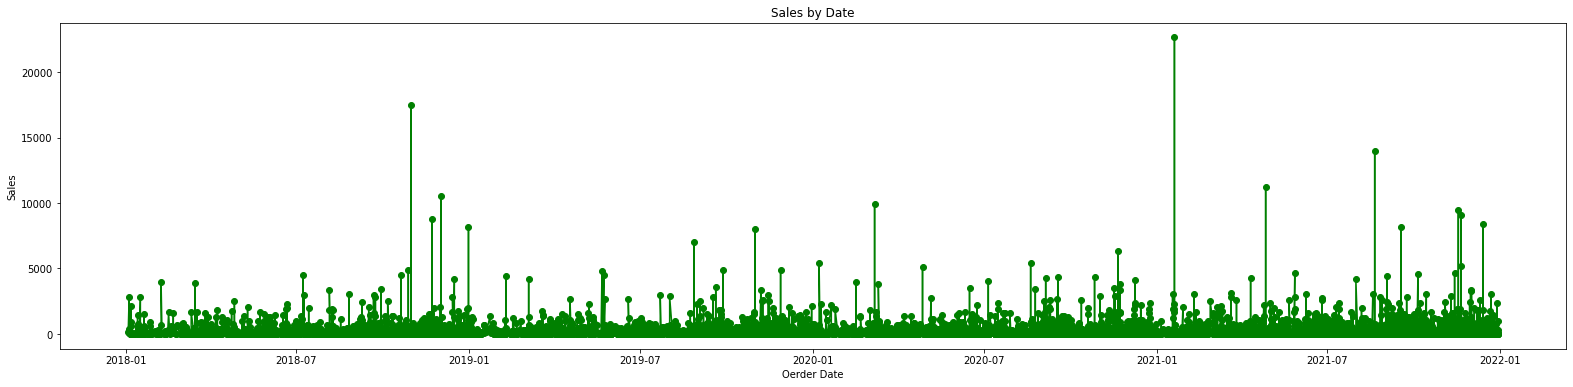

In [182]:
plt.figure(figsize=(27,6))

plt.plot(sorted_df.Order_Date, sorted_df.Sales, color='green', marker='o', linestyle='solid')
plt.title("Sales by Date")
plt.xlabel("Oerder Date")
plt.ylabel("Sales")

6) Use Pandas to merge two datasets together based on a common key

In [183]:
df2 = pd.read_excel("superstore.xlsx")
df2.head(2)

,Days to Ship (Actual),Days to Ship (Scheduled),Profit per Customer,Profit per Order,Sales Forecast,Sales per Customer,Units Estimate,Ship Status,Profit Ratio,Category,...,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,4,6,40,39.60,104,79.20,4,Shipped Early,0.50,Office Supplies,...,"Fellowes Folders, Blue",40,3,North,79,Corporate,2018-02-11,Standard Class,England,Storage
1,4,6,0,0.00,510,388.92,9,Shipped Early,0.00,Technology,...,"SanDisk Numeric Keypad, Bluetooth",0,7,North,389,Corporate,2018-02-11,Standard Class,England,Accessories
2,4,6,16,16.11,46,35.19,4,Shipped Early,0.46,Office Supplies,...,"Avery Legal Exhibit Labels, 5000 Label Set",16,3,North,35,Corporate,2018-02-11,Standard Class,England,Labels
3,4,6,13,13.20,67,50.94,3,Shipped Early,0.26,Office Supplies,...,"Fellowes Folders, Wire Frame",13,2,North,51,Corporate,2018-02-11,Standard Class,England,Storage
4,4,6,74,73.71,403,307.44,4,Shipped Early,0.24,Technology,...,"Memorex Memory Card, USB",74,3,North,307,Corporate,2018-02-11,Standard Class,England,Accessories


In [184]:
newdf = df.merge(df2, on='Category',how='right')
newdf.head(5)

,Segment_x,Category,Sub_Category,City_x,Order_Date,Postal_Code,Region_x,Ship_Status,State_x,Profit_x,...,Product Name,Profit_y,Quantity_y,Region_y,Sales_y,Segment_y,Ship Date,Ship Mode,State_y,Sub-Category
0,Corporate,Office Supplies,Folders,Leominster,2019-11-26,1453.0,Eastern,Early Delivery,Massachusetts,17.0,...,"Fellowes Folders, Blue",40,3,North,79,Corporate,2018-02-11,Standard Class,England,Storage
1,Corporate,Office Supplies,Folders,Leominster,2019-11-26,1453.0,Eastern,Early Delivery,Massachusetts,12.0,...,"Fellowes Folders, Blue",40,3,North,79,Corporate,2018-02-11,Standard Class,England,Storage
2,Consumer,Office Supplies,Label Maker Tape,Leominster,2019-02-25,1453.0,Eastern,Early Delivery,Massachusetts,3.0,...,"Fellowes Folders, Blue",40,3,North,79,Corporate,2018-02-11,Standard Class,England,Storage
3,Consumer,Office Supplies,Printing Paper,Leominster,2019-02-25,1453.0,Eastern,Early Delivery,Massachusetts,55.0,...,"Fellowes Folders, Blue",40,3,North,79,Corporate,2018-02-11,Standard Class,England,Storage
4,Corporate,Office Supplies,Printing Paper,Leominster,2019-11-26,1453.0,Eastern,Early Delivery,Massachusetts,16.0,...,"Fellowes Folders, Blue",40,3,North,79,Corporate,2018-02-11,Standard Class,England,Storage


7) Create a box plot to visualize the distribution of a variable across different categories.

Text(0.5, 1.0, 'Quantity by Category')

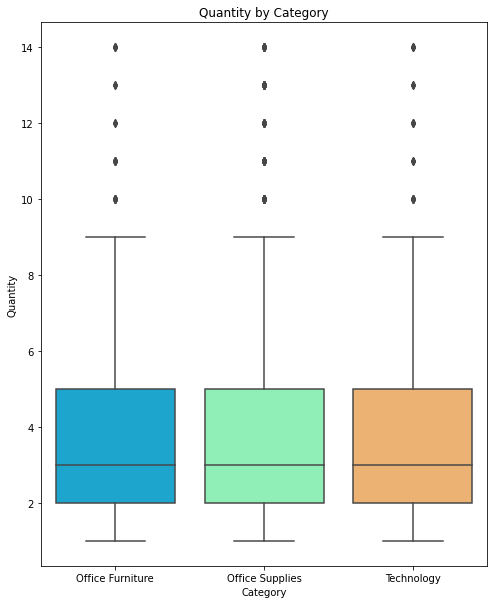

In [185]:
plt.figure(figsize=(8,10))
sns.boxplot(x='Category',y='Quantity',data=df, palette='rainbow')
plt.title("Quantity by Category")

8) Create a histogram using Matplotlib to visualize the distribution of a variable in a dataset.

Text(0.5, 1.0, 'Sub-categories')

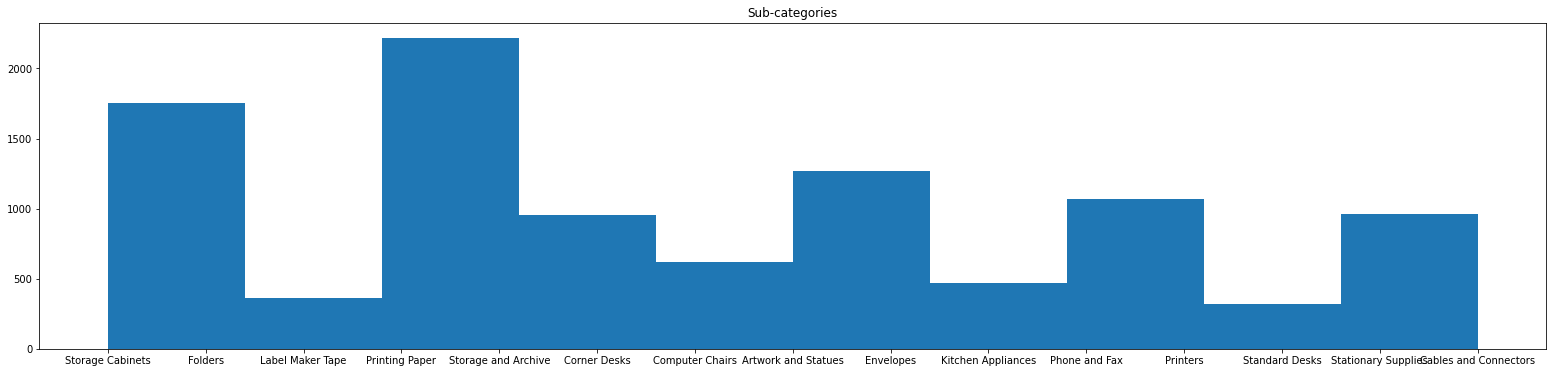

In [186]:
plt.figure(figsize=(27,6))
plt.hist(df.Sub_Category)
plt.title('Sub-categories')